# ANALYSING LICENSE AND FOOTFALL DATASETS

# SECTION A

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import pysal
from shapely.geometry import Point
from __future__ import division

In [2]:
#reading in data
df_licenses = pd.read_csv('LiveLicences.csv')

In [3]:
#using a copy of the dataframe
df_copy = df_licenses.copy()

In [4]:
#checking the unique types of premises in Westminster
df_copy.PremisesType.unique()

array(['Type - Restaurant', 'Type - Public house or pub restaurant',
       'Type - Takeaway food outlet', 'Type - Shop',
       'Type - Club or institution', 'Type - Cafe',
       'Type - Civic amenity site', 'Type - Office',
       'Type - Conference or exhibition centre',
       'Type - University land or building', 'Type - Cinema',
       'Type - HQs and Institutional Offices',
       'Type - Night clubs and discos', 'Type - Wine bar',
       'Type - Hotel, 4+ star or major chain',
       'Type - College of Further Education',
       'Type - Pub or pub restaurant with lodge', 'Type - Food store',
       'Type - Civic/public building',
       'Type - Kiosk within another property',
       'Type - Hotel, 3 star or under',
       'Type - Private Hospitals and Clinics', 'Type - Shop (large)',
       'Type - Food store (large)', 'Type - Park / Open Space',
       'Type - Studio', 'Type - Theatre', 'Type - Department store',
       'Type - Museums & Art Galleries', 'Revised Type - Restau

In [5]:
#removing unwanted strings
df_copy['PremisesType'] = df_copy['PremisesType'].str.replace('Type -','')

In [6]:
#removing unwanted strings
df_copy['PremisesType'] = df_copy['PremisesType'].str.replace('Revised','')

In [7]:
#removing white space created by removing unwanted strings
df_copy['PremisesType'] = df_copy['PremisesType'].str.strip()

In [8]:
#calculating frequency of premises type
df_copy['PremisesTypecCount'] = df_copy.groupby('PremisesType')['PremisesType'].transform('count')

Pub or pub restaurant with lodge, Wine bar, Night clubs and discos, Clubhouse, Snooker hall or club, 

In [9]:
#selecting attributes of interest
west = df_copy.ix[:,['Ward','Street','PremisesType','PremisesTypecCount']]

In [10]:
#creating new dataframe where list in dataframe
west_2 = df_copy[df_copy['PremisesType'].isin(['Pub or pub restaurant with lodge', 'Wine bar', 'Night clubs and discos', 'Clubhouse', 'Snooker hall or club'])]

In [11]:
#printing results
west_2

,LicenceNumber,LicenceApplicationKey,TradingName,UPRN,Address,Postcode,Street,Ward,StressArea,PremisesType,ApplicationGroupSubType,IssuedDate,ApplicantName,ApplicantAddress,Lat,Long,Capacity,PremisesTypecCount
33,09/00739/LIPCH,74607,Crobar,1.003354e+10,Ground Floor 17 Manette Street London W1D 4AS,W1D 4AS,Manette Street,West End,West End,Night clubs and discos,Premises,13/05/2014,Mr Steven Lyle Horne,"Flat 2B ,2 Andrews Road,Hackney,London,E8 4QL",51.514913,-0.130326,<250,111
35,09/00829/LIPDPS,78315,BBAR,1.000230e+11,43 Buckingham Palace Road London SW1W 0PP,SW1W 0PP,Buckingham Palace Road,St James's,Not Recorded,Wine bar,Premises,17/02/2009,Red Carnation Hotels Limited,"15 Montague Street,Bloomsbury,London,WC1B 5BJ",51.498164,-0.143603,<100,48
47,09/02184/LIPV,104611,Royal Exchange Public House,1.000230e+11,Royal Exchange Public House 26 Sale Place Lond...,W2 1PU,Sale Place,Hyde Park,Not Recorded,Pub or pub restaurant with lodge,Premises,02/06/2009,P J Pubs Limited,"18 Nevern Mansions,42 Warwick Road,London,SW5 9TJ",51.518252,-0.169812,<50,97
52,09/02657/LIPT,91653,The Swan Public House,1.000230e+11,66 Bayswater Road London W2 3PH,W2 3PH,Bayswater Road,Lancaster Gate,Not Recorded,Pub or pub restaurant with lodge,Premises,16/06/2009,"Fuller, Smith & Turner Plc","Griffin Brewery,Chiswick Lane South ,London,W4...",51.511710,-0.177049,<100,97
56,09/02935/LIPV,102315,The Windmill,2.000030e+11,17-19 Great Windmill Street London W1D 7LQ,W1D 7LQ,Great Windmill Street,West End,West End,Night clubs and discos,Premises,12/10/2009,Big Country Limited,"58 - 60 Berners Street,London,W1T 3JS",51.511306,-0.134206,<250,111
88,09/05884/LIPDPS,83009,The Social,1.000230e+11,5 Little Portland Street London W1W 7JD,W1W 7JD,Little Portland Street,West End,Not Recorded,Night clubs and discos,Premises,19/10/2009,Bengred Limited,"56A Heverstock Hill,London,NW3 2BH,",51.517400,-0.140846,<250,111
112,09/07575/LIPV,102889,Sunset Strip,1.003353e+10,Basement To First Floor 30 Dean Street London ...,W1D 3SA,Dean Street,West End,West End,Night clubs and discos,Premises,19/11/2010,Mr Anthony Curran,"C/O LT LAW,18 Soho Square,London,W1D 3QL",51.513950,-0.132513,<100,111
158,10/01721/LIPVM,106076,The Yard Bar,1.000230e+11,57 Rupert Street London W1D 7PJ,W1D 7PJ,Rupert Street,West End,West End,Wine bar,Premises,03/01/2014,Mr Andrew Colin Jones,"LT Law ,18 Soho Square ,London,W1D 3QL",51.512003,-0.133947,<250,48
204,10/05633/LIPDPS,84299,Casanova Nite Club,2.000020e+11,181 Edgware Road London W2 1ET,W2 1ET,Edgware Road,Hyde Park,Edgware Road,Night clubs and discos,Premises,29/09/2010,Mr Fuad Suzali,"Flat 11,Crompton House,Hall Place,London,W2 1LX,",51.518350,-0.168078,<250,111
212,10/06521/LIPDPS,84256,Cristini Restaurant,1.000230e+11,28 Sussex Place London W2 2TH,W2 2TH,Sussex Place,Hyde Park,Not Recorded,Wine bar,Premises,21/09/2010,Mr Guerrino Angelo Grazioli,"318b Kennington Lane ,London ,SE11 5AY",51.513405,-0.171577,<50,48


In [135]:
#counting the number of premises type in each ward in westminster
west_2.groupby('Ward')['PremisesType'].value_counts()

Ward                         PremisesType                    
Abbey Road                   Pub or pub restaurant with lodge     4
Bayswater                    Pub or pub restaurant with lodge     2
                             Night clubs and discos               1
Bryanston and Dorset Square  Pub or pub restaurant with lodge     4
                             Wine bar                             1
Church Street                Pub or pub restaurant with lodge     2
Churchill                    Snooker hall or club                 2
                             Pub or pub restaurant with lodge     1
Harrow Road                  Pub or pub restaurant with lodge     1
Hyde Park                    Pub or pub restaurant with lodge     9
                             Wine bar                             4
                             Night clubs and discos               1
                             Snooker hall or club                 1
Knightsbridge and Belgravia  Pub or pub restaurant wit

# SECTION B

In [23]:
#selecting attributes of interest
west_ward = west_2.ix[:,['Ward','PremisesType']]

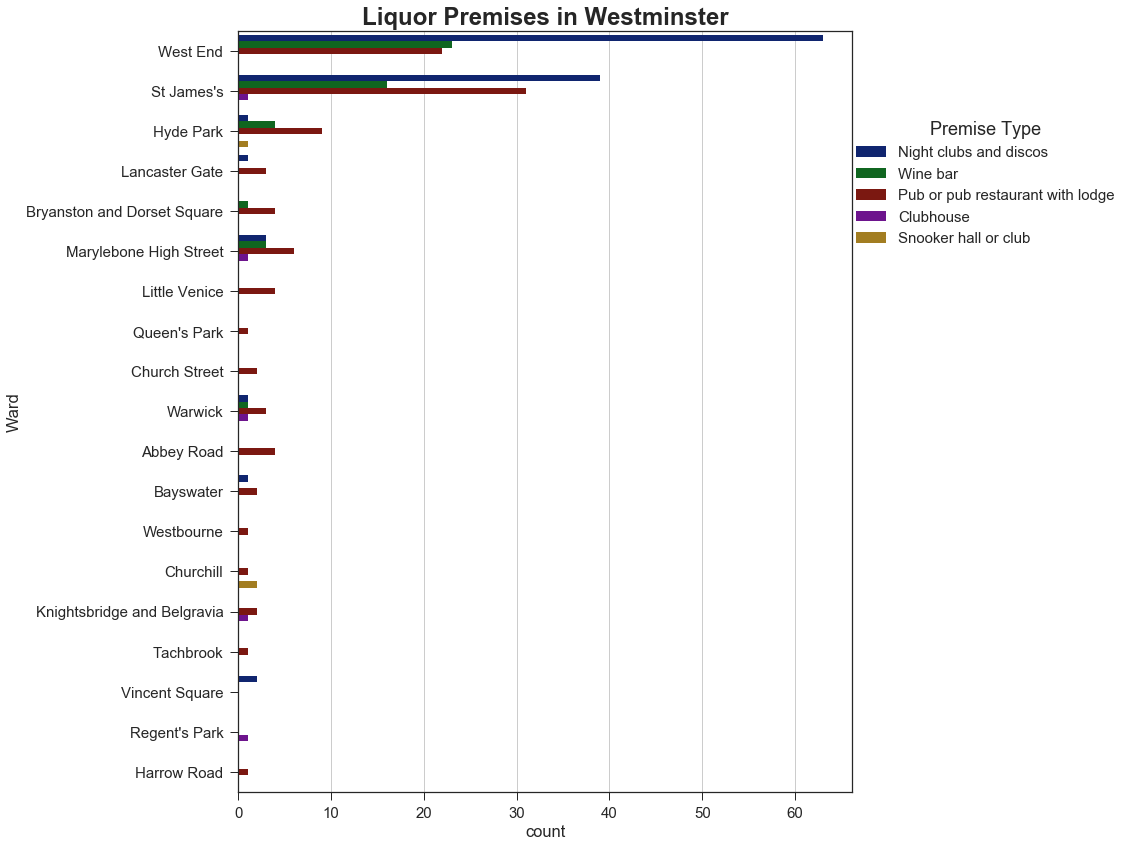

In [127]:
#plotting dataframe of liquor premises in Westminster
sns.set(font_scale=1.5) 
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
figure, ax = plt.subplots(figsize=(11, 14))
sns.countplot(y='Ward' , hue="PremisesType", data=west_ward, palette=sns.color_palette("dark", 5),ax=ax)
ax.xaxis.grid(which='major')
ax.set_title('Liquor Premises in Westminster', fontsize=24,fontweight='bold')
ax.legend(loc='upper right',bbox_to_anchor=(1.45, 0.9),title='Premise Type')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/premise_type.png',bbox_inches="tight")

In [131]:
#selecting only restaurants from dataframe
restaurants = west[west.PremisesType=='Restaurant']

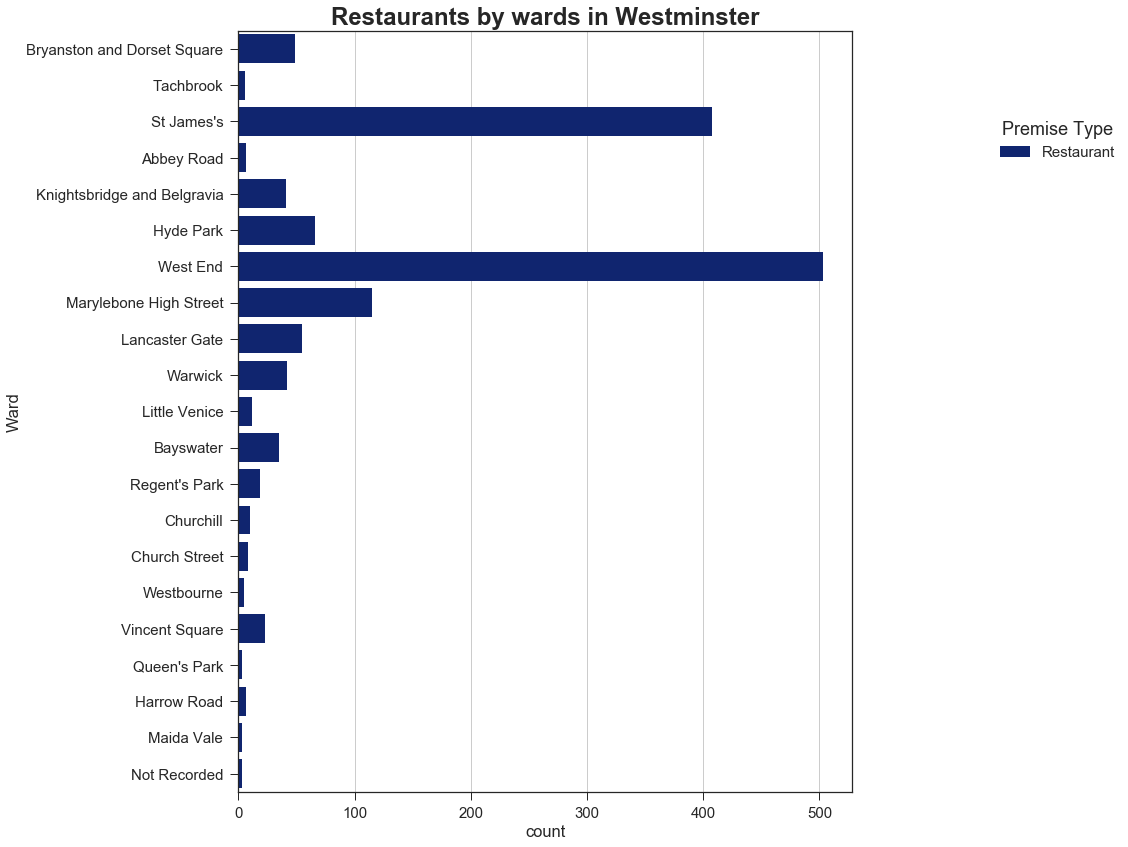

In [133]:
#plotting count of restaurants per ward in Westminster
sns.set(font_scale=1.5) 
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
figure, ax = plt.subplots(figsize=(11, 14))
sns.countplot(y='Ward' , hue="PremisesType", data=restaurants, palette=sns.color_palette("dark", 5),ax=ax)
ax.xaxis.grid(which='major')
ax.set_title('Restaurants by wards in Westminster', fontsize=24,fontweight='bold')
ax.legend(loc='upper right',bbox_to_anchor=(1.45, 0.9),title='Premise Type')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/restaurant.png',bbox_inches="tight")

# SECTION C

# FOOTFALL 

In [25]:
#reading in data
footfall = pd.read_csv('Footfall.csv')

In [26]:
#filtering the timehourband for evening economy
evening_foot  = footfall[(footfall.Time>='18:00') & (footfall.Time<='20:00')]

In [27]:
#filtering complaints made at night. That is between 20:00 and 04:00
ngt1 = footfall[(footfall.Time>'20:00') & (footfall.Time<='23:59')]
ngt2 = footfall[(footfall.Time>='00:00') & (footfall.Time<='04:00')]

In [28]:
#joining the two segments of received time to represent night-time complaints
night_foot = pd.concat([ngt1,ngt2])

In [29]:
#checking evening time to confirm time band
evening_foot.Time.unique()

array(['18:00', '19:00', '20:00'], dtype=object)

In [30]:
#checking night time to make sure its as expected
night_foot.Time.unique()

array(['21:00', '22:00', '23:00', '00:00', '01:00', '02:00', '03:00',
       '04:00'], dtype=object)

In [31]:
#selecting attributes of interest
ftfall_eve = evening_foot.ix[:,['Ward','Year','Month','InCount','OutCount']]

In [32]:
#selecting attributes of interest
ftfall_ngt = night_foot.ix[:,['Ward','Year','Month','InCount','OutCount']]

In [33]:
#removing duplicates
ftfall_eve = ftfall_eve.drop_duplicates().reset_index()

In [34]:
#dropping duplicate rows
ftfall_ngt = ftfall_ngt.drop_duplicates().reset_index()

In [35]:
#grouping InCount by ward and year for evening
ft_ward = ftfall_eve.groupby(['Ward','Year'])['InCount'].sum().unstack('Year').dropna()

In [36]:
#grouping InCount by ward and year
ft_ward_night = ftfall_ngt.groupby(['Ward','Year'])['InCount'].sum().unstack('Year').dropna()

In [37]:
#importing module to display full number on the color bar in the heatmap plot
import matplotlib.ticker as tkr

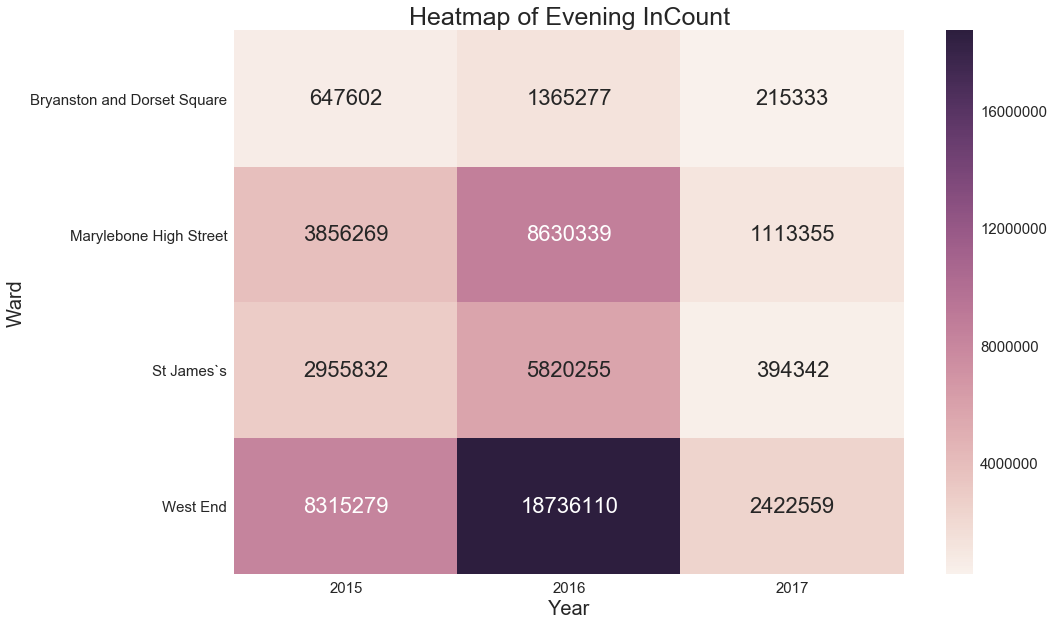

In [89]:
#creating a heatmap of InCount grouped by ward and year
f, ax = plt.subplots(figsize=(15,10))
formatter = tkr.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
sns.heatmap(ft_ward, annot=True, fmt='.10g',cbar_kws={'format':formatter},annot_kws={"size":22})
plt.title('Heatmap of Evening InCount', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Ward', fontsize=20)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/heat_incount_year.png',bbox_inches="tight")

In [39]:
#percentage increase from 2015 to 2016 for evening footfall
in_pct_yr = ((18736110-8315279)/18736110)*100
print '%s' % (round(in_pct_yr,2)) +'%'

55.62%


The footfall data only showed 6 entries for ward, namely, 'Not Recorded', 'Hyde Park', 'Bryanston and Dorset Square',
'West End', 'Marylebone High Street', and 'St James`s'. This means the sensor device was onl located in these wards.
The counts gives an indication of the number of patrons visiting each ward. The data was collected over three years, that is, 2015,2016 and 2017. The first data was recorded on 27 July 2015 and the last data was recorded on 28 February 
2017. 

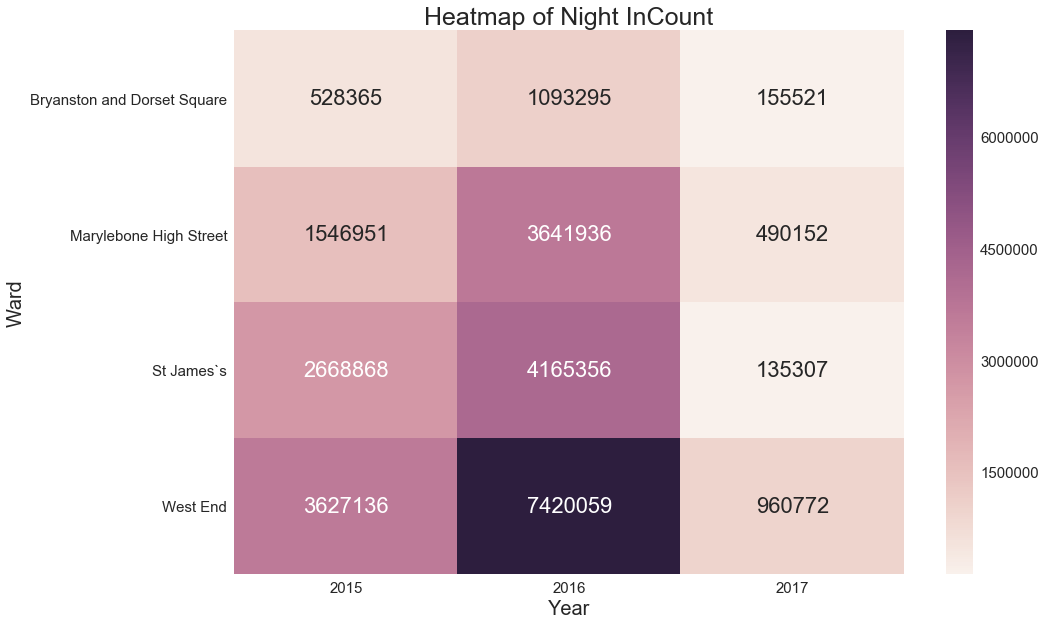

In [90]:
#creating a heatmap of InCount grouped by ward and year
f, ax = plt.subplots(figsize=(15,10))
formatter = tkr.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
sns.heatmap(ft_ward_night, annot=True, fmt='.10g',cbar_kws={'format':formatter},annot_kws={"size":22})
plt.title('Heatmap of Night InCount', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Ward', fontsize=20)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/heat_incount_year_night.png',bbox_inches="tight")

In [41]:
#percentage increase from 2015 to 2016 for night footfall
in_pct_yr_ngt = ((7420059-3627136)/7420059)*100
print '%s' % (round(in_pct_yr_ngt,2)) +'%'

51.12%


In [42]:
#grouping InCount by ward and month
ft_ward2 = ftfall_eve.groupby(['Ward','Month'])['InCount'].sum().unstack('Month').dropna()

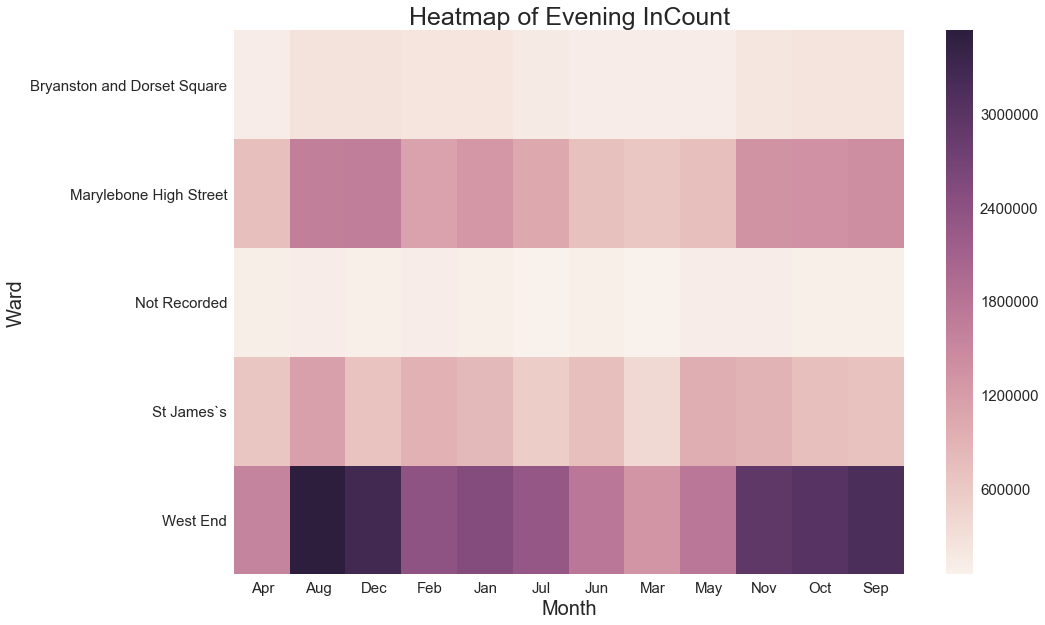

In [91]:
#creating a heatmap of InCount grouped by ward and month
f, ax = plt.subplots(figsize=(15,10))
formatter = tkr.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.title('Heatmap of Evening InCount',fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Ward', fontsize=20)
sns.heatmap(ft_ward2,cbar_kws={'format':formatter})
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/heat_incount_month.png',bbox_inches="tight")

In [44]:
ft_ward5_ngt = ftfall_ngt.groupby(['Ward','Month'])['InCount'].sum().unstack('Month').dropna()

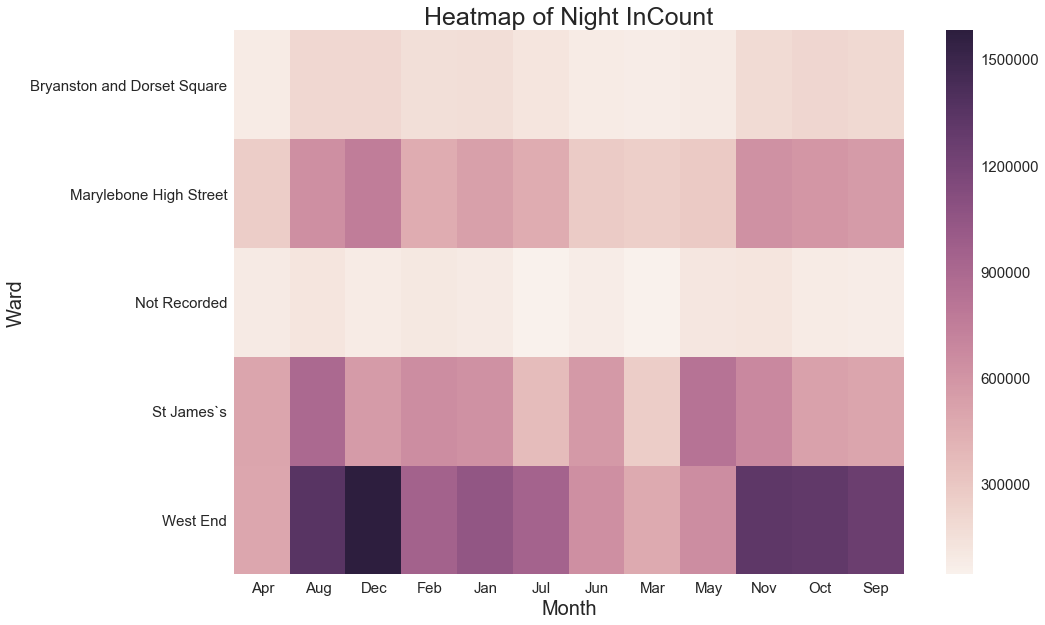

In [92]:
#creating a heatmap of InCount grouped by ward and month
f, ax = plt.subplots(figsize=(15,10))
formatter = tkr.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.title('Heatmap of Night InCount',fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Ward', fontsize=20)
sns.heatmap(ft_ward5_ngt,cbar_kws={'format':formatter})
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/heat_incount_month_ngt.png',bbox_inches="tight")

In [46]:
#grouping OutCount by ward and year
ft_ward3 = ftfall_eve.groupby(['Ward','Year'])['OutCount'].sum().unstack('Year').dropna()

In [47]:
#grouping InCount by ward and year
ft_ward3_ngt = ftfall_ngt.groupby(['Ward','Year'])['OutCount'].sum().unstack('Year').dropna()

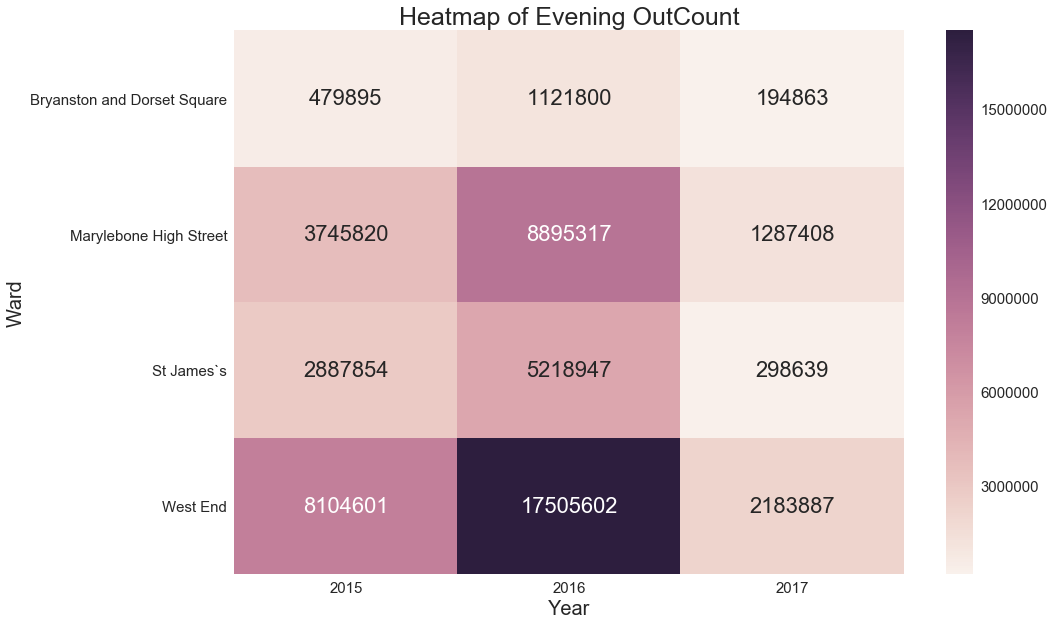

In [93]:
#creating a heatmap of OutCount grouped by ward and year
f, ax = plt.subplots(figsize=(15,10))
formatter = tkr.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
sns.heatmap(ft_ward3, annot=True, fmt='.10g',cbar_kws={'format':formatter},annot_kws={"size":22})
plt.title('Heatmap of Evening OutCount',fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Ward', fontsize=20)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/heat_outcount_year.png',bbox_inches="tight")

In [49]:
#percentage increase from 2015 to 2016 for evening footfall
out_pct_yr = ((17505602-8104601)/17505602)*100
print '%s' % (round(out_pct_yr,2)) +'%'

53.7%


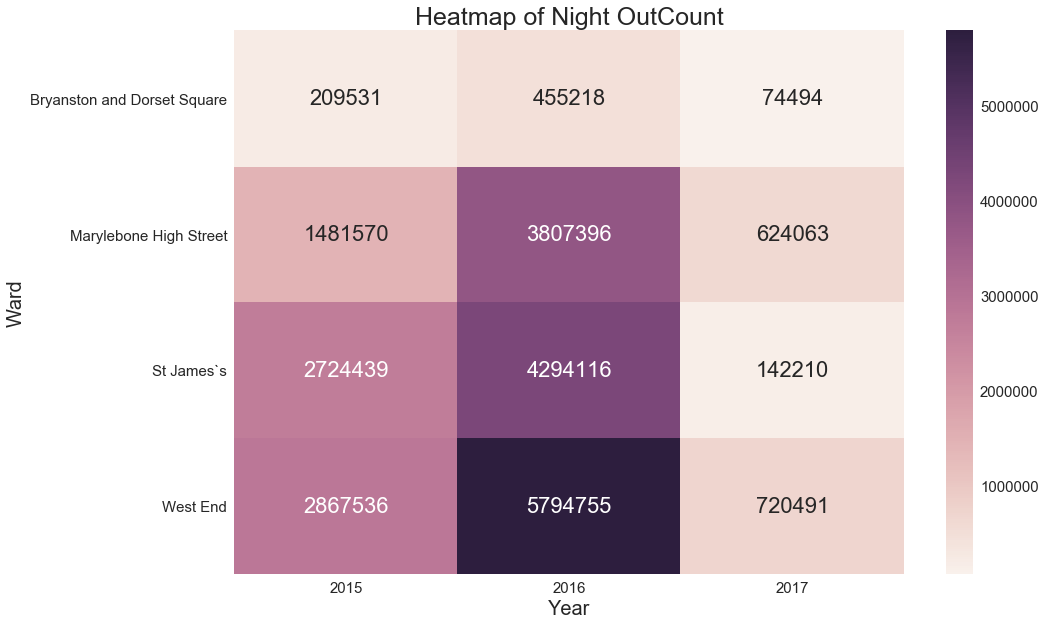

In [94]:
#creating a heatmap of OutCount grouped by ward and year
f, ax = plt.subplots(figsize=(15,10))
formatter = tkr.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
sns.heatmap(ft_ward3_ngt, annot=True, fmt='.10g',cbar_kws={'format':formatter},annot_kws={"size":22})
plt.title('Heatmap of Night OutCount',fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Ward', fontsize=20)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/heat_outcount_year_ngt.png',bbox_inches="tight")

In [51]:
#percentage increase from 2015 to 2016 for evening footfall
out_pct_yr_ngt = ((5794755-2867536)/5794755)*100
print '%s' % (round(out_pct_yr_ngt,2)) +'%'

50.51%


In [95]:
#grouping OutCount by ward and month
ft_ward4 = ftfall_eve.groupby(['Ward','Month'])['OutCount'].sum().unstack('Month').dropna()

In [96]:
#grouping InCount by ward and month
ft_ward4_ngt = ftfall_ngt.groupby(['Ward','Month'])['OutCount'].sum().unstack('Month').dropna()

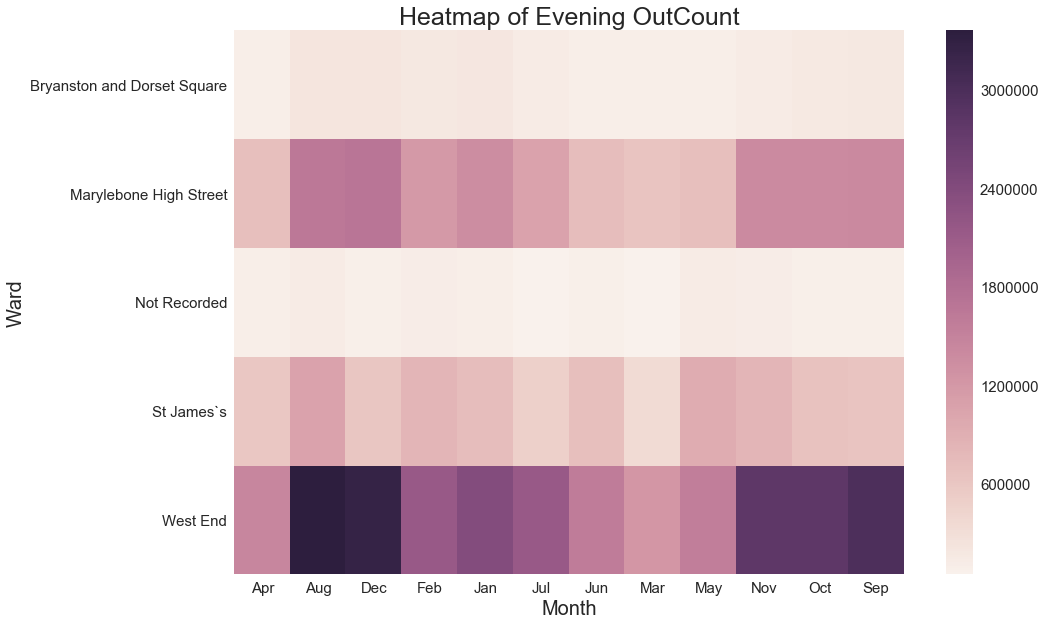

In [119]:
#creating a heatmap of OutCount grouped by ward and month
f, ax = plt.subplots(figsize=(15,10))
formatter = tkr.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
sns.heatmap(ft_ward4,cbar_kws={'format':formatter})
plt.title('Heatmap of Evening OutCount',fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Ward', fontsize=20)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/heat_outcount_month.png',bbox_inches="tight")

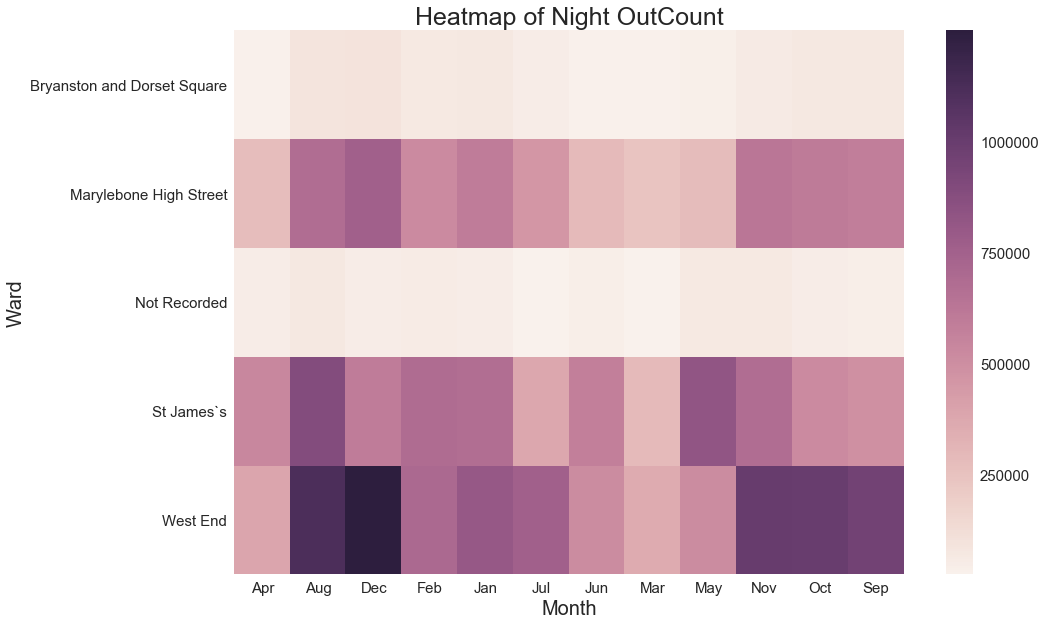

In [120]:
#creating a heatmap of OutCount grouped by ward and month
f, ax = plt.subplots(figsize=(15,10))
formatter = tkr.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
sns.heatmap(ft_ward4_ngt,cbar_kws={'format':formatter})
plt.title('Heatmap of Night OutCount',fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Ward', fontsize=20)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/heat_outcount_month_ngt.png',bbox_inches="tight")

# SECTION D

This section is to create a footfall dataframe to use in R for statistical analysis. The dataframe is stored in this notebook
and read in another notebook (DATAFRAME FOR ALL)

In [103]:
#checking the number of years footfall data was collected
footfall.Year.unique()

array([2016, 2015, 2017])

In [104]:
#checking dates data was collected
first_date = footfall[footfall.Date.str.contains('2015')]

In [105]:
#printing results
first_date.Date.unique()

array(['2015-11-06', '2015-11-02', '2015-11-07', '2015-11-08',
       '2015-11-05', '2015-11-03', '2015-11-04', '2015-08-07',
       '2015-08-03', '2015-08-08', '2015-08-09', '2015-08-06',
       '2015-08-04', '2015-08-05', '2015-10-09', '2015-10-05',
       '2015-10-10', '2015-10-11', '2015-10-08', '2015-10-06',
       '2015-10-07', '2015-09-11', '2015-09-07', '2015-09-12',
       '2015-09-13', '2015-09-10', '2015-09-08', '2015-09-09',
       '2015-12-11', '2015-12-07', '2015-12-12', '2015-12-13',
       '2015-12-10', '2015-12-08', '2015-12-09', '2015-11-13',
       '2015-11-09', '2015-11-14', '2015-11-15', '2015-11-12',
       '2015-11-10', '2015-11-11', '2015-08-14', '2015-08-10',
       '2015-08-15', '2015-08-16', '2015-08-13', '2015-08-11',
       '2015-08-12', '2015-10-16', '2015-10-12', '2015-10-17',
       '2015-10-18', '2015-10-15', '2015-10-13', '2015-10-14',
       '2015-09-18', '2015-09-14', '2015-09-19', '2015-09-20',
       '2015-09-17', '2015-09-15', '2015-09-16', '2015-

In [106]:
#checking last dates data was collected
last_date = footfall[footfall.Date.str.contains('2017')]

In [107]:
#printing results
last_date.Date.unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-02-02', '2017-01-30', '2017-01-31',
       '2017-02-01', '2017-02-03', '2017-02-04', '2017-02-05',
       '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
       '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
       '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
       '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
       '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
       '2017-02-26', '2017-02-27', '2017-02-28'], dtype=object)

In [108]:
#checking for entries of stress area
footfall.StressArea.unique()

array(['Not Recorded', 'Edgware Road', 'West End'], dtype=object)

In [109]:
#creating new column to store sum of InCount and Outcount
ftfall_eve_tot = ftfall_eve.drop('index',axis=1)

In [110]:
#creating column to contain sum of incount and outcount for evening footfall
ftfall_eve_tot['TotalCount'] = ftfall_eve_tot.InCount + ftfall_eve_tot.OutCount

In [111]:
#aggregating total count for each ward for evening footfall
eve_grp_ft = pd.DataFrame(ftfall_eve_tot.groupby('Ward')['TotalCount'].sum())

In [112]:
#renaming column
eve_grp_ft = eve_grp_ft.rename(columns={'TotalCount':'Evening_footfall'})

In [113]:
#creating column to contain the sum of incount and outcount for night footfall
ftfall_ngt_tot['TotalCount'] = ftfall_ngt_tot.InCount + ftfall_ngt_tot.OutCount

In [114]:
#aggregating total count for each ward for night footfall
ngt_grp_ft = pd.DataFrame(ftfall_ngt_tot.groupby('Ward')['TotalCount'].sum())

In [115]:
#renaming column
ngt_grp_ft = ngt_grp_ft.rename(columns={'TotalCount':'Night_footfall'})

In [116]:
#joining evening and night dataframes 
foot_grp = pd.concat([eve_grp_ft,ngt_grp_ft],axis=1)

In [117]:
#removing unwanted row
foot_grp = foot_grp.drop(foot_grp.index[3])

In [118]:
#storing dataframe to use in DATAFRAME FOR ALL notebook file
%store foot_grp

Stored 'foot_grp' (DataFrame)
